In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

## Chargement des données

In [3]:
fafr = pd.read_excel(r"C:\Users\sgasmi\Desktop\Extractions\Query_poly_20210104104610.xlsx", converters={'Matricule':str}) # effectif présent

## Analyse des données

### Affichage des données du fichier Fafr

In [4]:
fafr.columns

Index(['Matricule', 'Type de ressource', 'Matricule ARAMIS', 'Nº de période',
       'Nom', 'Prénom', 'Date de naissance', 'Début contrat initial',
       'Code Etablissement', 'Etablissement', 'Date de fin', 'Ancienneté',
       'Ancienneté groupe', 'Genre', 'Date naissance', 'Code cycle',
       'Libellé du cycle de travail', 'E.T.P', 'Horaire hebdo', '% rém',
       'Nombre de jours annuel', 'Convention coll.', 'Catég conv',
       'Classif. conv.', 'Niveau', 'Échelon', 'Coeff',
       'Catégorie professionnelle', 'Libellé Cat Pro', 'BU', 'Code UT', 'UT',
       'Code Contrat', 'Libellé contrat', 'Motif du contrat',
       'Libellé du motif de contrat', 'Code motif de recours au CDD',
       'Libellé cas de recours au CDD', 'Code de l'emploi',
       'Libellé de l'emploi', 'Code ODM', 'Code du lieu de travail',
       'Libellé du lieu de travail', 'Name', 'Code section analytique',
       'Matricule responsable UT', 'Nom responsable UT',
       'Prénom responsabe UT', 'Matricule res

### Affichage du type des colonnes (nombres/text/date..)

In [6]:
fafr.dtypes

Matricule                                object
Type de ressource                         int64
Matricule ARAMIS                         object
Nº de période                             int64
Nom                                      object
Prénom                                   object
Date de naissance                datetime64[ns]
Début contrat initial            datetime64[ns]
Code Etablissement                        int64
Etablissement                            object
Date de fin                      datetime64[ns]
Ancienneté                       datetime64[ns]
Ancienneté groupe                datetime64[ns]
Genre                                    object
Date naissance                   datetime64[ns]
Code cycle                               object
Libellé du cycle de travail              object
E.T.P                                   float64
Horaire hebdo                           float64
% rém                                   float64
Nombre de jours annuel                  

### Analyse des specificité d'un champ

In [13]:
fafr["Nom"].describe()

count       9581
unique      7508
top       MARTIN
freq          29
Name: Nom, dtype: object

<b1> Un peu de HTML : on constate que le nom <strong> Martin </strong> est le nom le plus donné </b1>

In [25]:
colonne = "BU"
nb_occurence = fafr[colonne].describe()[3]
norme = fafr[colonne].describe()[2]

In [26]:
md("Un peu d'HTML dynamique, la norme est <strong> {} </strong>, le nombre d'occurence est de <strong> {} </strong>.".format(norme, nb_occurence))

Un peu d'HTML dynamique, la norme est <strong> IB </strong>, le nombre d'occurence est de <strong> 2835 </strong>.

<b1>Il est possible d'ajouter des images
<img src="Logo-Framatome-HD.png" width="150"></b1>


### Analyse du nombre de ligne et colonne !

In [31]:
fafr.shape

(9581, 51)

In [32]:
print("Le fichier comporte {} lignes et {} colonnes".format(fafr.shape[0], fafr.shape[1]))

Le fichier comporte 9581 lignes et 51 colonnes


## Use Case : Analyse de la distribution des noms pour la répartition des connexions aux VPN

### Recherche de valeur vide

In [42]:
fafr["Nom"].isna().sum()

0

Par chance le nombre de valeur vide est nul. Nous pouvons avancer!

### Création d'une colonne contenant que la première lettre du nom

In [46]:
fafr["first name letter"] = fafr["Nom"].apply(lambda x:x[0])

### Vérification qu'il n'existe pas de miniscule et de vide en cherchant les valeurs disctincts

In [47]:
fafr["first name letter"].unique()

array(['R', 'F', 'B', 'G', 'S', 'V', 'K', 'I', 'W', 'L', 'M', 'H', 'P',
       'C', 'J', 'T', 'D', 'A', 'N', 'Z', 'E', 'Q', 'Y', 'O', 'U', 'X'],
      dtype=object)

### Classement des valeurs par ordre alphabétique

In [55]:
fafr= fafr.sort_values(["first name letter"])

In [58]:
print(fafr["first name letter"].head(10))

1831    A
7442    A
6523    A
7048    A
7044    A
4273    A
8623    A
2133    A
1510    A
3270    A
Name: first name letter, dtype: object


### Création d'un histogramme pour observer la répartition

(array([4.02880701e-02, 1.22951675e-01, 9.05959712e-02, 9.28921824e-02,
        1.48209999e-02, 4.06011899e-02, 7.34787600e-02, 3.01638660e-02,
        5.63615489e-03, 1.92046759e-02, 1.72215844e-02, 7.65055840e-02,
        9.23703163e-02, 1.48209999e-02, 8.66297881e-03, 7.01388164e-02,
        3.96618307e-03, 5.23953658e-02, 4.76985701e-02, 3.50694082e-02,
        1.56559858e-03, 3.42344223e-02, 6.47114080e-03, 1.04373239e-04,
        8.14111262e-03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <BarContainer object of 25 artists>)

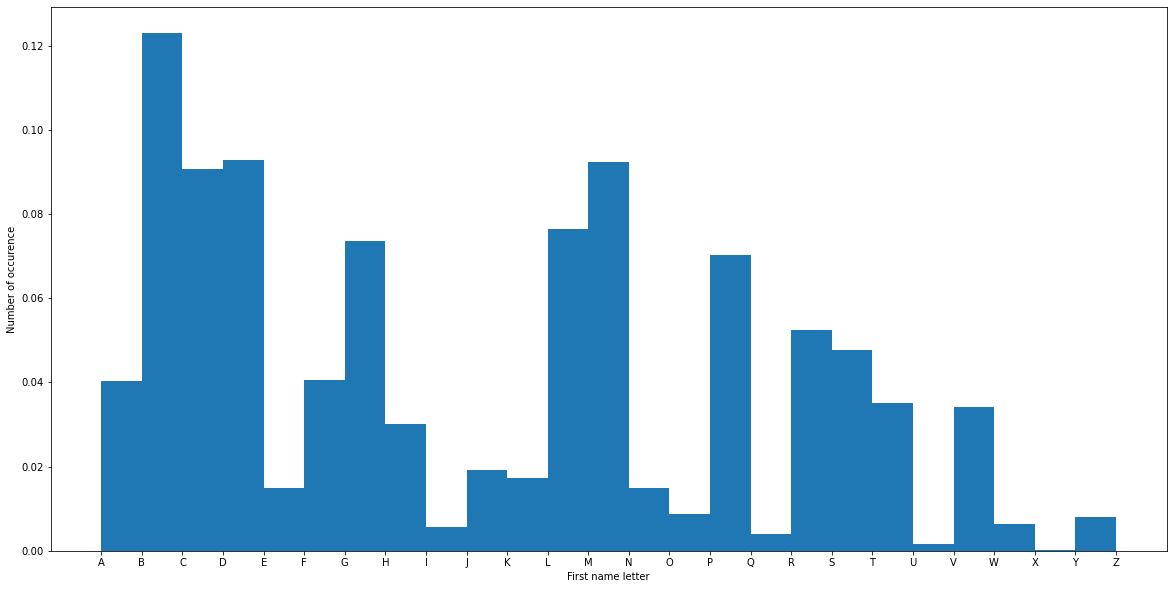

In [104]:
plt.figure(figsize=(20,10))
x = fafr["first name letter"]
plt.xlabel("First name letter")
plt.ylabel("Number of occurence")
plt.hist(x,bins=25,density=True)

In [125]:
Letter_distribution = fafr.groupby(["first name letter"]).size().cumsum().reset_index()
Letter_distribution.columns = ["Letter distribution", "cumulate_occ"]

In [136]:
test=pd.qcut(Letter_distribution["cumulate_occ"], q=6)

In [137]:
print(test)

0      (385.999, 3528.833]
1      (385.999, 3528.833]
2      (385.999, 3528.833]
3      (385.999, 3528.833]
4      (385.999, 3528.833]
5     (3528.833, 4961.333]
6     (3528.833, 4961.333]
7     (3528.833, 4961.333]
8     (3528.833, 4961.333]
9       (4961.333, 6938.0]
10      (4961.333, 6938.0]
11      (4961.333, 6938.0]
12      (4961.333, 6938.0]
13      (6938.0, 8136.667]
14      (6938.0, 8136.667]
15      (6938.0, 8136.667]
16      (6938.0, 8136.667]
17    (8136.667, 9385.333]
18    (8136.667, 9385.333]
19    (8136.667, 9385.333]
20    (8136.667, 9385.333]
21      (9385.333, 9581.0]
22      (9385.333, 9581.0]
23      (9385.333, 9581.0]
24      (9385.333, 9581.0]
25      (9385.333, 9581.0]
Name: cumulate_occ, dtype: category
Categories (6, interval[float64]): [(385.999, 3528.833] < (3528.833, 4961.333] < (4961.333, 6938.0] < (6938.0, 8136.667] < (8136.667, 9385.333] < (9385.333, 9581.0]]


In [134]:
Letter_distribution

,Letter distribution,cumulate_occ
0,A,386
1,B,1564
2,C,2432
3,D,3322
4,E,3464
5,F,3853
6,G,4557
7,H,4846
8,I,4900
9,J,5084


(A-E), (F-I) , (G-I), (H-M), (N-Q), (R-U), (V-Z)

In [ ]:
VPN backup/secours 1	A, B
VPN backup/secours 2	C, D, E
VPN backup/secours 3	F, G, H, I
VPN backup/secours 4	J, K, L
VPN backup/secours 5	M, N, O, P, Q
VPN backup/secours 6	R, S, T, U, V, W, X, Y, Z

